# The standard beginning - load the libraries

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.18.0


# Let's load the Fashion MNIST dataset directly from TensorFlow.
This dataset contains 70,000 grayscale images in 10 categories.
The images show individual articles of clothing at low resolution (28 by 28 pixels).
Fashion MNIST is intended as a drop-in replacement for the classic MNIST dataset.
Here, 60,000 images are used to train the network and 10,000 images to evaluate
how accurately the network learned to classify images.


In [ ]:

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()



29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Explore the format of the dataset.
Loading the dataset returns four NumPy arrays:
The train_images and train_labels arrays are the training set—the data the model uses to learn.
The model is tested against the test set, the test_images, and test_labels arrays.
The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255.
The labels are an array of integers, ranging from 0 to 9. These correspond to the
class of clothing the image represents.

In [ ]:
print("Training images shape:", train_images.shape)
print("Number of training labels:", len(train_labels))
print("Test images shape:", test_images.shape)
print("Number of test labels:", len(test_labels))



Training images shape: (60000, 28, 28)
Number of training labels: 60000
Test images shape: (10000, 28, 28)
Number of test labels: 10000


# Define class names for later use.
Since the class names are not included with the dataset, store them here to use later
when plotting the images.

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


# Scale pixel values to the range of 0 to 1.
The data must be preprocessed before training the network. If you inspect the first
image in the training set, you will see that the pixel values fall in the range of 0 to 255.
Scale these values to a range of 0 to 1 before feeding them to the neural network model.
To do so, divide the values by 255. It's important that the training set and the testing
set be preprocessed in the same way.

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0



# Display the first 25 images from the training set.
To verify that the data is in the correct format and that you're ready to build and
train the network, let's display the first 25 images from the training set and display
the class name below each image.

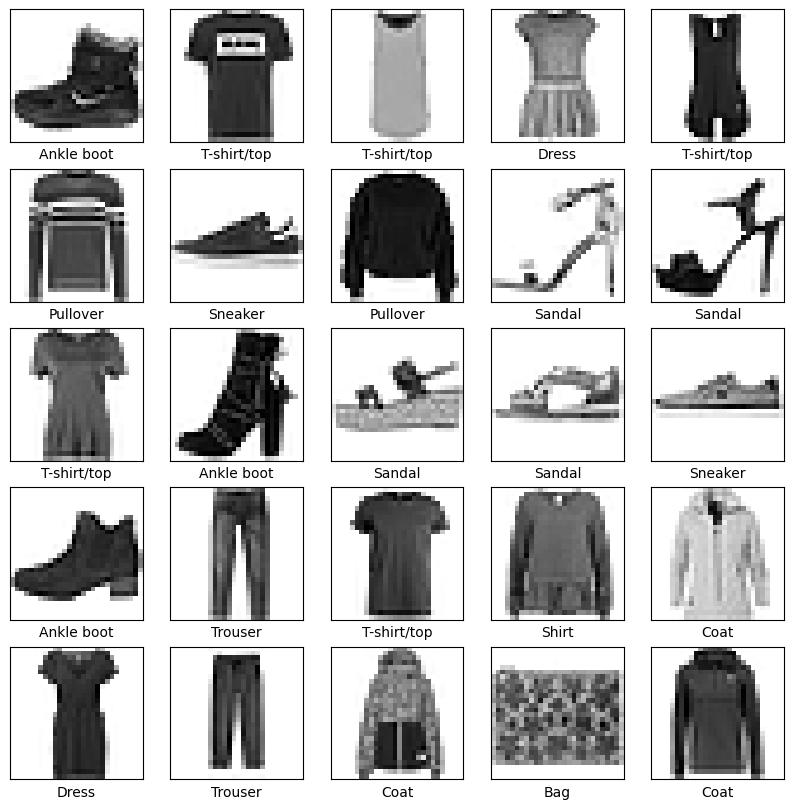

In [ ]:
"""
"""
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()



# Set up the layers of the neural network.
The basic building block of a neural network is the layer. Layers extract representations
from the data fed into them. Hopefully, these representations are meaningful for the
problem at hand.
Most of deep learning consists of chaining together simple layers. Most layers, such as
tf.keras.layers.Dense, have parameters that are learned during training.
The first layer in this network, tf.keras.layers.Flatten, transforms the format of the
images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array
(of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image
and lining them up. This layer has no parameters to learn; it only reformats the data.
After the pixels are flattened, the network consists of a sequence of two
tf.keras.layers.Dense layers. These are densely connected, or fully connected, neural
layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer
returns a logits array with length of 10. Each node contains a score that indicates the
current image belongs to one of the 10 classes.

In [ ]:

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(10)
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Compile the model.
Before the model is ready for training, it needs a few more settings. These are added
during the model's compile step:
Optimizer — This is how the model is updated based on the data it sees and its loss function.
Loss function — This measures how accurate the model is during training. You want to
minimize this function to "steer" the model in the right direction.
Metrics — Used to monitor the training and testing steps. The following example uses
accuracy, the fraction of the images that are correctly classified.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



# Train the neural network model.
Training the neural network model requires the following steps:
1. Feed the training data to the model. In this example, the training data is in the
   train_images and train_labels arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the
   test_images array.
4. Verify that the predictions match the labels from the test_labels array.
To start training, call the model.fit method—so called because it "fits" the model
to the training data.

# We will store the training history to plot accuracy and loss.

In [ ]:

history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7406 - loss: 0.7933 - val_accuracy: 0.8454 - val_loss: 0.4347
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8510 - loss: 0.4132 - val_accuracy: 0.8621 - val_loss: 0.3826
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8657 - loss: 0.3714 - val_accuracy: 0.8664 - val_loss: 0.3616
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8757 - loss: 0.3431 - val_accuracy: 0.8743 - val_loss: 0.3480
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8863 - loss: 0.3177 - val_accuracy: 0.8780 - val_loss: 0.3339
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8883 - loss: 0.3079 - val_accuracy: 0.8765 - val_loss: 0.3397
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8939 - loss: 0.2919 - val_accuracy: 0.8790 - val_loss: 0.3373
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8994 - loss: 0.2759

# Plot the training and validation accuracy.
We use the 'history' object returned by model.fit to access the training metrics.
We also use a validation split during training to monitor performance on unseen data.


Text(0.5, 1.0, 'Training and Validation Accuracy')

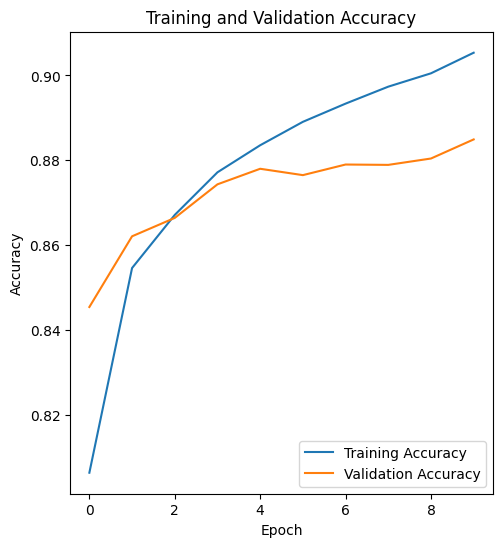

In [ ]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')



# Plot the training and validation loss.

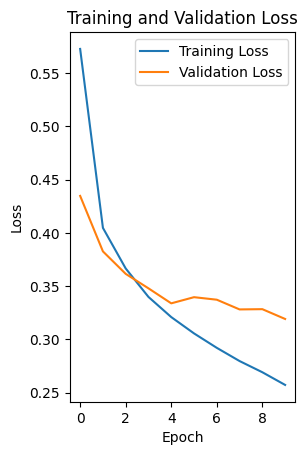

In [ ]:

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Evaluate accuracy on the test dataset.
Next, compare how the model performs on the test dataset.
It turns out that the accuracy on the test dataset is a little less than the accuracy
on the training dataset. This gap between training accuracy and test accuracy represents
overfitting. Overfitting happens when a machine learning model performs worse on new,
previously unseen inputs than it does on the training data. An overfitted model
"memorizes" the noise and details in the training dataset to a point where it negatively
impacts the performance of the model on the new data.

In [ ]:

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)



313/313 - 1s - 3ms/step - accuracy: 0.8735 - loss: 0.3474

Test accuracy: 0.8734999895095825


# Make predictions using the trained model.
With the model trained, you can use it to make predictions about some images.
Attach a softmax layer to convert the model's linear outputs—logits—to probabilities,
which should be easier to interpret.

In [ ]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


# Define functions to plot images and prediction arrays.

In [ ]:

def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                          100 * np.max(predictions_array),
                                          class_names[true_label]),
               color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')



# Plot the first few test images with their predictions.
Let's look at the 0th image, predictions, and prediction array. Correct prediction
labels are blue and incorrect prediction labels are red. The number gives the percentage
(out of 100) for the predicted label.
Let's plot several images with their predictions. Note that the model can be wrong
even when very confident.

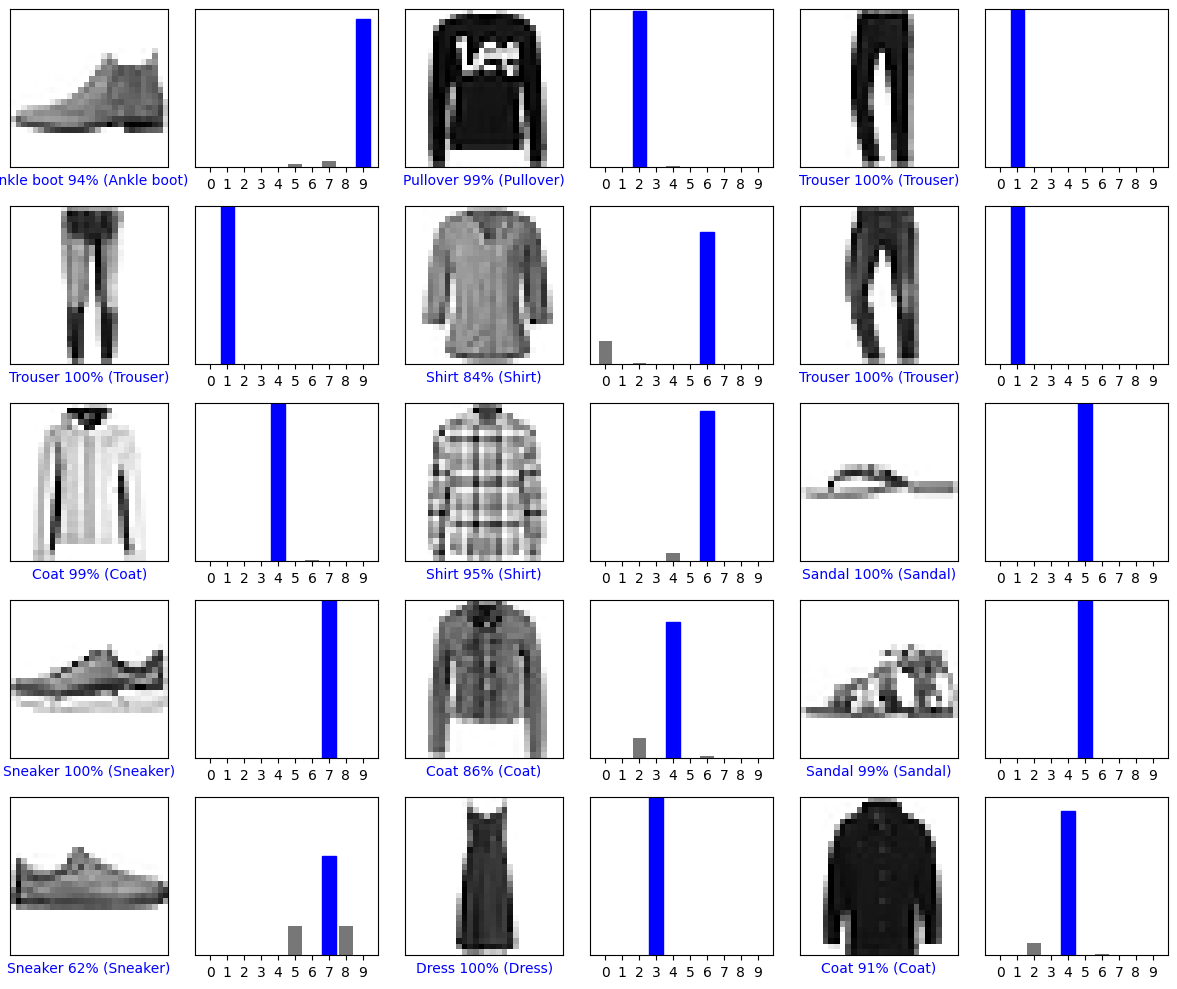

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()



# Make a prediction on a single image.

Single image shape: (28, 28)


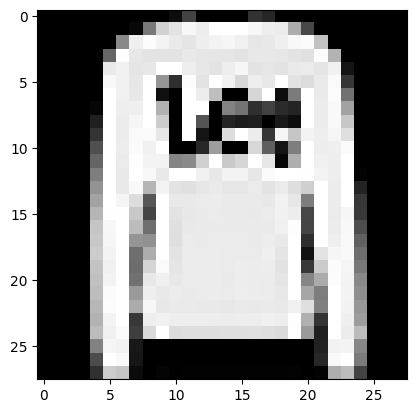

In [ ]:

img = test_images[1]
print("Single image shape:", img.shape)
plt.imshow(img, cmap='gray')
plt.show()



tf.keras models are optimized to make predictions on a batch, or collection, of
examples at once. Accordingly, even though you're using a single image, you need
to add it to a list.

In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img, 0))
print("Batched image shape:", img.shape)



Batched image shape: (1, 28, 28)


# Now predict the correct label for this image.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Single image predictions: [[7.1296201e-04 1.5762487e-06 9.8600292e-01 2.3154400e-06 1.0221371e-02
  2.7416601e-07 3.0373777e-03 5.1258189e-07 2.0609639e-05 4.1046007e-08]]


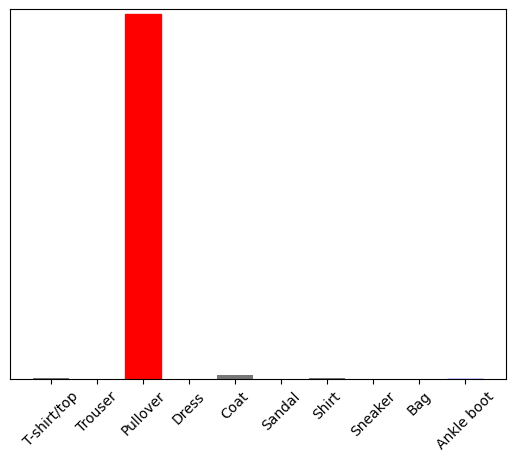

In [ ]:

predictions_single = probability_model.predict(img)
print("Single image predictions:", predictions_single)

plot_value_array(0, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()



tf.keras.Model.predict returns a list of lists—one list for each image in the
batch of data. Grab the predictions for our (only) image in the batch.


In [ ]:

print("Predicted label index:", np.argmax(predictions_single[0]))
print("Predicted label:", class_names[np.argmax(predictions_single[0])])
print("True label:", class_names[test_labels[1]])



Predicted label index: 2
Predicted label: Pullover
True label: Pullover


# To learn more about building models with Keras, see the Keras guides.